In [44]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv("EBITDA_new.csv")
df

,ticker,fiscalQuarter,capitalExpenditure_,netIncome_,operatingIncome_,shareholdersEquity_,totalAssets_,EPS_,debtToTotalAssets,niToAsset,...,EBITDA,salePrice,realGDPSA,m2SA,m2MinusM1SA,m2Velocity,primeRate,EBITDA_lag1,year,quarter
0,BEKE,2018Q4,2.214287,-1.851296,2.202100,1.345779,0.859941,-0.06,-0.382122,-0.012037,...,1.033,0.327146,0.010720,0.000000,0.284392,0.068826,5.278226,NaN,2018,4
1,BEKE,2019Q1,2.214287,-1.851296,2.202100,1.345779,0.859941,-0.06,-0.382122,-0.012037,...,0.774,-0.048026,0.058035,0.022556,0.304473,0.048583,5.500000,1.033,2019,1
2,BEKE,2019Q2,2.214287,2.148704,2.191615,1.345779,0.859941,0.07,-0.382122,-0.012037,...,0.813,1.118003,0.121723,0.043370,0.319416,0.056680,5.500000,0.774,2019,2
3,BEKE,2019Q3,2.214287,2.148704,2.191615,1.345779,0.859941,0.07,-0.382122,-0.012037,...,0.781,0.912971,0.211692,0.076738,0.345735,0.032389,5.307692,0.813,2019,3
4,BEKE,2019Q4,2.214287,-1.851296,2.202100,2.359933,1.678841,-0.35,-0.468720,-0.040849,...,0.782,0.820989,0.264739,0.115313,0.374278,-0.036437,4.834677,0.781,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,TCN,2019Q1,-0.324047,0.890075,-0.333179,0.963534,0.193026,0.21,-0.678295,0.013399,...,0.796,-0.048026,0.058035,0.022556,0.304473,0.048583,5.500000,1.314,2019,1
262,TCN,2019Q2,-0.285743,0.369699,-0.330484,1.304297,0.296714,0.05,-0.726028,0.005913,...,1.181,1.118003,0.121723,0.043370,0.319416,0.056680,5.500000,0.796,2019,2
263,TCN,2019Q3,0.066905,1.206442,-0.333483,1.340340,0.324008,0.20,-0.710833,0.015137,...,0.806,0.912971,0.211692,0.076738,0.345735,0.032389,5.307692,1.181,2019,3
264,TCN,2019Q4,0.150273,1.690997,-0.332212,1.341730,0.315679,0.29,-0.721200,0.020241,...,1.135,0.820989,0.264739,0.115313,0.374278,-0.036437,4.834677,0.806,2019,4


In [46]:
df.dropna(inplace=True)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Compute RMSE, R-Squared, and MPAE for each target column

y_true = df["EBITDA"]
y_pred = df["EBITDA_lag1"]

rmse = mean_squared_error(y_true, y_pred)
r_squared = r2_score(y_true, y_pred)
mpae = mean_absolute_percentage_error(y_true, y_pred)

performance_metrics = {'RMSE': rmse, 'R-Squared': r_squared, 'MPAE': mpae}

# Convert results to DataFrame for better visualization
performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')

print(performance_df)

                  0
RMSE       2.270186
R-Squared  0.342974
MPAE       1.222080


In [48]:
df = df[['ticker', 'fiscalQuarter', 'EBITDA']]

In [49]:
import matplotlib.pyplot as plt
from pmdarima import auto_arima

quarter_to_month = {
    'Q1': 1,  # Q1 -> 1月
    'Q2': 4,  # Q2 -> 4月
    'Q3': 7,  # Q3 -> 7月
    'Q4': 10  # Q4 -> 10月
}

# 从 fiscalQuarter 列中提取年份和季度，然后转化为日期
df['date'] = df['fiscalQuarter'].apply(lambda x: pd.to_datetime(f"{x[:4]}-{quarter_to_month[x[4:]]}-01"))

# 按照公司ID和日期排序
df = df.sort_values(by=['ticker', 'date'])

# 设置索引
df.set_index(['ticker', 'date'], inplace=True)

# 查看转换后的数据
print(df.head())

                  fiscalQuarter  EBITDA
ticker date                            
BEKE   2019-01-01        2019Q1   0.774
       2019-04-01        2019Q2   0.813
       2019-07-01        2019Q3   0.781
       2019-10-01        2019Q4   0.782
       2020-01-01        2020Q1   0.664


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-15.264, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=52.570, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-7.303, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=36.588, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-16.309, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=21.630, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-16.996, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-16.005, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-21.761, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-22.819, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-24.773, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-22.845, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.897 seconds
Performing stepwise search to minimize aic


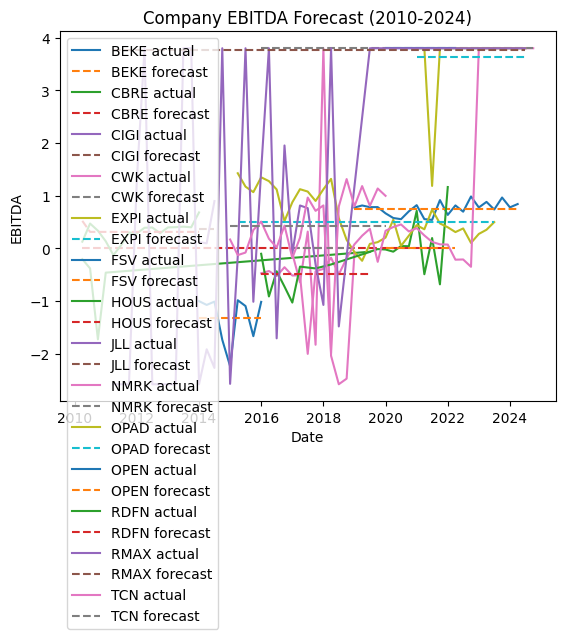

R² Scores:
BEKE: 0.0000
CBRE: -0.0450
CIGI: -0.0000
CWK: -0.1110
EXPI: -0.0477
FSV: 0.0000
HOUS: -0.2282
JLL: nan
NMRK: -3.2779
OPAD: 0.0000
OPEN: -73123188914830188383177600401408.0000
RDFN: 0.0000
RMAX: -0.6828
TCN: 0.0000


In [51]:
# 存储预测结果和真实值
forecast_results = {}
actual_results = {}

# 为每个公司拟合模型
for ticker in df.index.get_level_values('ticker').unique():
    company_data = df.loc[ticker, 'EBITDA']
    
    # 使用 auto_arima 自动选择最优参数
    model = auto_arima(company_data, 
                       seasonal=False, 
                       trace=True,  # 输出搜索过程
                       suppress_warnings=True, 
                       stepwise=True)  # 自动搜索最优的模型参数
    
    # 预测2010-2024年
    forecast = model.predict(n_periods=len(company_data))
    forecast_results[ticker] = forecast
    actual_results[ticker] = company_data
    
    # 绘制真实值和预测值
    plt.plot(company_data.index, company_data, label=f'{ticker} actual')
    plt.plot(company_data.index, forecast, label=f'{ticker} forecast', linestyle='--')

# 绘制整体图
plt.title('Company EBITDA Forecast (2010-2024)')
plt.xlabel('Date')
plt.ylabel('EBITDA')
plt.legend()
plt.show()

# 计算R²值
r2_scores = {}
for ticker in forecast_results:
    r2_scores[ticker] = r2_score(actual_results[ticker], forecast_results[ticker])

# 输出R²值
print("R² Scores:")
for ticker, r2 in r2_scores.items():
    print(f"{ticker}: {r2:.4f}")